# SECOP II - Exploración
En este cuaderno se realiza análisis exploratorio de los datos mediante estadísticas descriptivas, pruebas y gráficas.

In [1]:
import sys
print(sys.executable)

c:\Users\andres.salazar\anaconda3\envs\vigia_art\python.exe


In [2]:
#Librerias
import os
import pandas as pd
import numpy as np
import datetime
import time
import scipy
import pycorrcat.pycorrcat as corrcat  #Calcula la V de cramer para variables categóricas.

import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import squarify
import seaborn as sns
import plotly.express as px  #**
import plotly.graph_objs as go

%matplotlib inline
pd.plotting.register_matplotlib_converters()
pd.set_option('display.max_columns', None, 'display.max_colwidth', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)


## Gráficas informes sin filtrar variables 

In [3]:
#Leer base de datos
secopII_Master = pd.read_csv('created_data\SECOPII_Master_t.csv')

In [4]:
secopII_Master.dtypes

Nombre Entidad                 object
Nit Entidad                     int64
Departamento                   object
Orden                          object
Sector                         object
                                ...  
Tuvo_adiciones_valor            int64
Tuvo_adiciones_tiempo           int64
Tuvo_adiciones                  int64
Tipo Empresa Proveedor         object
Fecha inscripcion proveedor    object
Length: 61, dtype: object

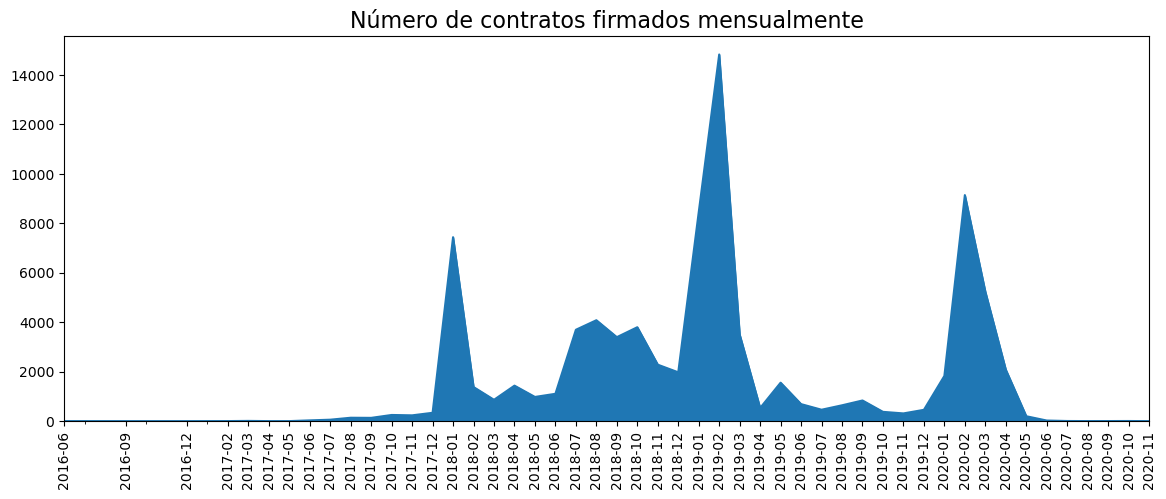

In [5]:
#Dar formato de fecha
secopII_Master['Fecha de Firma'] = pd.to_datetime(secopII_Master['Fecha de Firma'], format='%m/%d/%Y')
#Dar formato de periodicidad mensual
conteo_mensual_contratos = secopII_Master['Fecha de Firma'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(14,5))
conteo_mensual_contratos.plot(kind='area')
plt.xticks(conteo_mensual_contratos.index, conteo_mensual_contratos.index, rotation=90)
plt.title('Número de contratos firmados mensualmente', fontsize=16)

#Guardar
plt.savefig('created_data/figures/serie_contratos_firmados_mensual.png', bbox_inches = "tight")

In [6]:
pd.to_numeric(secopII_Master['Fecha de Firma'].dt.year).value_counts().sort_index()

2016.00        4
2017.00     1201
2018.00    32438
2019.00    32640
2020.00    18531
Name: Fecha de Firma, dtype: int64

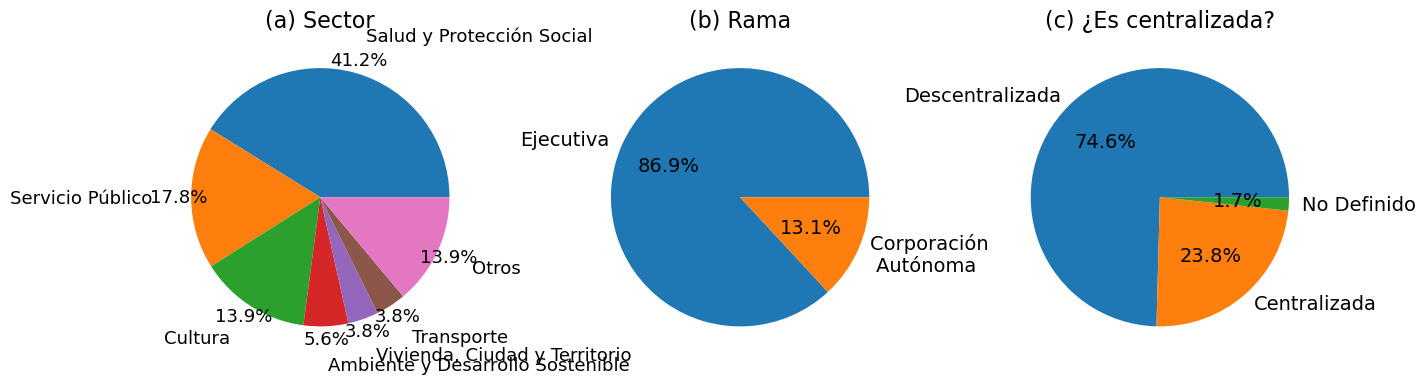

In [7]:
conteo_sector = secopII_Master['Sector'].value_counts(normalize=True)
conteo_sector['Otros'] = conteo_sector[6:].sum()
conteo_sector = conteo_sector.drop(index=conteo_sector[6:-1].index)

# secopII_Master['Rama'].value_counts(normalize=True)
# secopII_Master['Entidad Centralizada'].value_counts(normalize=True)

#Los tres pie
fig, axs = plt.subplots(1,3, figsize=(15,8))
plt.subplots_adjust(wspace=0.3)
#Secto
axs[0].pie(conteo_sector, 
           autopct='%.1f%%', pctdistance=1.1,
           labels=conteo_sector.index, labeldistance=1.3,
           textprops={'fontsize': 13}
          )
axs[0].set_title('(a) Sector', fontsize=16)

#Rama           
axs[1].pie(secopII_Master['Rama'].value_counts(normalize=True),
           autopct='%.1f%%', 
           labels=['Ejecutiva', 'Corporación \n Autónoma'],
           textprops={'fontsize': 14}
          )
axs[1].set_title('(b) Rama', fontsize=16)

#Centralizada           
axs[2].pie(secopII_Master['Entidad Centralizada'].value_counts(normalize=True),
           autopct='%.1f%%',
           labels=secopII_Master['Entidad Centralizada'].value_counts(normalize=True).index,
           textprops={'fontsize': 14}
          )
axs[2].set_title('(c) ¿Es centralizada?', fontsize=16)

#Guardar
plt.savefig('created_data/figures/tortas_sector_rama_centralizado.png')

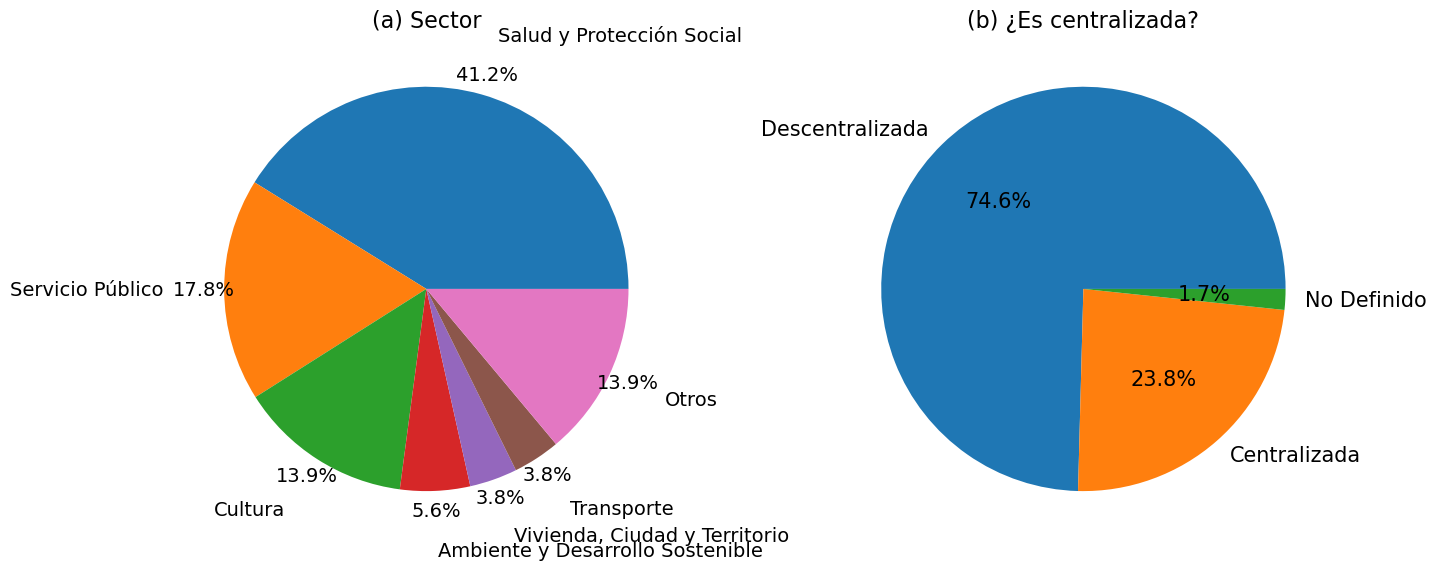

In [8]:
conteo_sector = secopII_Master['Sector'].value_counts(normalize=True)
conteo_sector['Otros'] = conteo_sector[6:].sum()
conteo_sector = conteo_sector.drop(index=conteo_sector[6:-1].index)

# secopII_Master['Rama'].value_counts(normalize=True)
# secopII_Master['Entidad Centralizada'].value_counts(normalize=True)

#Los tres pie
fig, axs = plt.subplots(1,2, figsize=(15,8))
plt.subplots_adjust(wspace=0.3)
#Secto
axs[0].pie(conteo_sector, 
           autopct='%.1f%%', pctdistance=1.1,
           labels=conteo_sector.index, labeldistance=1.3,
           textprops={'fontsize': 14}
          )
axs[0].set_title('(a) Sector', fontsize=16)

#Centralizada           
axs[1].pie(secopII_Master['Entidad Centralizada'].value_counts(normalize=True),
           autopct='%.1f%%',
           labels=secopII_Master['Entidad Centralizada'].value_counts(normalize=True).index,
           textprops={'fontsize': 15}
          )
axs[1].set_title('(b) ¿Es centralizada?', fontsize=16)

#Guardar
plt.savefig('created_data/figures/tortas_sector_centralizado.png')

count              87387.00
mean        659050822683.91
std       51356836451844.62
min                    0.00
25%              9571100.00
50%             20292696.00
75%             42000000.00
max     6325511058088889.00
Name: Valor del Contrato, dtype: float64
0.02547289642624189


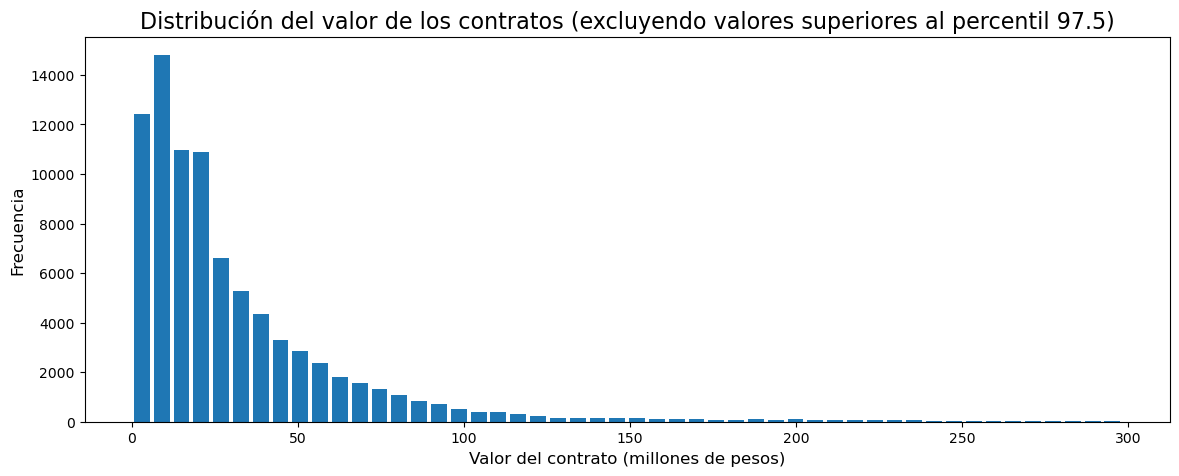

In [9]:
print(secopII_Master['Valor del Contrato'].describe())
print((secopII_Master['Valor del Contrato']==0).sum()/secopII_Master.shape[0])

#Eliminar valores superiores al percentil 95 de la distribución
q95 = secopII_Master['Valor del Contrato'].quantile(0.975)
valor_contratos = secopII_Master.loc[secopII_Master['Valor del Contrato'] < q95, 'Valor del Contrato']

plt.figure(figsize=(14,5))
plt.hist(valor_contratos/1000000, bins=50, rwidth=0.8)
plt.ylabel('Frecuencia', fontsize=12)
plt.xlabel('Valor del contrato (millones de pesos)', fontsize=12)
plt.title('Distribución del valor de los contratos (excluyendo valores superiores al percentil 97.5)', fontsize=16)
#plt.ticklabel_format(style='sci', axis='x', scilimits=(2,6))

#Guardar
plt.savefig('created_data/figures/hist_valor_contratos.png')

Prestación de servicios   0.88
Otro                      0.04
DecreeLaw092/2017         0.03
Compraventa               0.02
Suministros               0.01
Name: Tipo de Contrato, dtype: float64


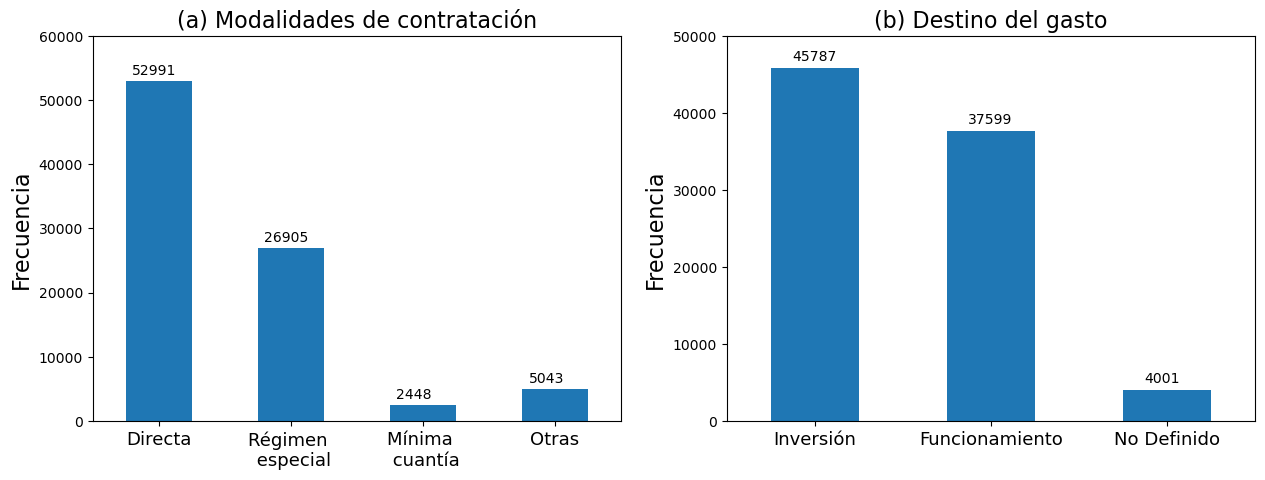

In [10]:
print(secopII_Master['Tipo de Contrato'].value_counts(normalize=True).head())
conteo_modContratacion = secopII_Master['Modalidad de Contratacion'].value_counts()
conteo_modContratacion['Otras'] = conteo_modContratacion[3:].sum()
conteo_modContratacion = conteo_modContratacion[[0,1,2,-1]]

plt.figure(figsize=(15,5))

#Modalidades de contratación
plt.subplot(121)
ax = conteo_modContratacion.plot(kind='bar')
plt.title('(a) Modalidades de contratación', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)
plt.ylim([0,60000])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() + 0.05, p.get_height() + 1000))

ax.set_xticklabels(['Directa', 'Régimen \n especial', 'Mínima \n cuantía', 'Otras'])
plt.xticks(rotation=0, fontsize=13)

#Destino de gasto
plt.subplot(122)
ax1 = secopII_Master['Destino Gasto'].value_counts().plot(kind='bar')
plt.title('(b) Destino del gasto', fontsize=16)
plt.ylabel('Frecuencia', fontsize=16)
plt.ylim([0,50000])
plt.xticks(rotation=0, fontsize=13)
for p in ax1.patches:
    ax1.annotate(str(round(p.get_height(),2)), (p.get_x() + 0.12, p.get_height() + 1000))

#Guardar
plt.savefig('created_data/figures/barras_modcontratacion_destgasto.png')

In [11]:
# print( secopII_Master['Es Pyme'].value_counts( normalize=True) )

# print(secopII_Master['TipoDocProveedor'].value_counts(normalize=True))

ct_docpyme = pd.crosstab(secopII_Master['Es Pyme'], secopII_Master['TipoDocProveedor'], 
                         margins=True, colnames=['Documento proveedor'])
ct_docpyme.loc['All',:] = ct_docpyme.loc['All',:]/secopII_Master.shape[0]
ct_docpyme.loc[:,'All'] = ct_docpyme.loc[:,'All']/secopII_Master.shape[0]
ct_docpyme.loc['All','All'] = 1
ct_docpyme = ct_docpyme.rename(index={'All':'Proporción del total'}, columns={'All':'Proporción del total'})
display(ct_docpyme)

#Convertir a Latex
ct_docpyme.to_latex('created_data/figures/tabla_pyme_docProveedor.txt')
      
#Guardar tabla en word
##Código tomado de "James": https://stackoverflow.com/questions/40596518/writing-a-python-pandas-dataframe-to-word-document

#El save no sobreescribe el documento word, así que se debe tener cuidado de no tener documento creado previamente.
# Un try puede solucionar esto
# table_doc = docx.Document()  #Crear documento

# # add a table to the end and create a reference variable
# # extra row is so we can add the header row
# t = table_doc.add_table(ct_docpyme.shape[0]+1, ct_docpyme.shape[1]+1)

# #Celda (0,0)
# t.cell(0,0).text = 'Documento proveedor \n \n Es Pyme'

# # add the header rows.
# for j in range(ct_docpyme.shape[-1]):
#     t.cell(0,j+1).text = ct_docpyme.columns[j]

# #Agregar indices
# for i in range(ct_docpyme.shape[0]):
#     t.cell(i+1,0).text = ct_docpyme.index[i]


# # add the rest of the data frame
# for i in range(ct_docpyme.shape[0]):
#     for j in range(ct_docpyme.shape[-1]):
#         t.cell(i+1,j+1).text = str(ct_docpyme.values[i,j])

# # save the doc
# table_doc.save('created_data/figures/tabla_pyme_docProveedor.docx')

Documento proveedor,Cédula de Ciudadanía,Cédula de Extranjería,NIT,No Definido,Otro,Pasaporte,Tarjeta de Identidad,Proporción del total
Es Pyme,,,,,,,,
No,68811.00,80.00,6327.00,298.00,26.00,5.00,1.00,0.86
Si,6121.00,14.00,5677.00,0.00,24.00,2.00,1.00,0.14
Proporción del total,0.86,0.00,0.14,0.00,0.00,0.00,0.00,1.00


In [12]:
print( (secopII_Master['Valor de pago adelantado']!=0).sum() )
print( secopII_Master.loc[secopII_Master['Valor de pago adelantado']!=0, 'Valor de pago adelantado'].describe() )
print(1332925852.00/20292696.00)

54
count           54.00
mean    1928868777.41
std     1843766652.48
min        5040000.00
25%      485903648.00
50%     1332925852.00
75%     3038197569.00
max     7287705201.00
Name: Valor de pago adelantado, dtype: float64
65.68500567889058


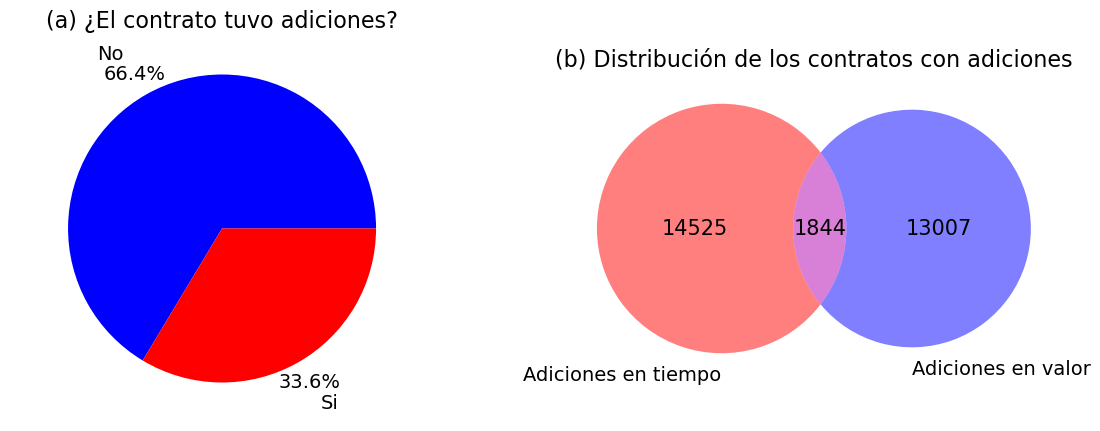

In [13]:
## Info tipo adición
conteo_tipoadic = secopII_Master.loc[secopII_Master['Tuvo_adiciones']==1, 
                                     ['Tuvo_adiciones_valor', 'Tuvo_adiciones_tiempo']].value_counts().reset_index()
conteo_tipoadic.index = ['Adiciones en tiempo', 'Adiciones en valor', 'Adiciones en tiempo y valor']

#Gráfica
plt.figure(figsize=(14,5))

#Gráfica izquierda
plt.subplot(121)
ax = secopII_Master['Tuvo_adiciones'].value_counts().plot(kind='pie', 
                                                     colors=['b','r'], 
                                                     labels=['No', 'Si'], labeldistance=1.3,
                                                     fontsize=14,
                                                     pctdistance=1.15, autopct="%.1f%%"
                                                    )
plt.title('(a) ¿El contrato tuvo adiciones?', fontsize=16)
plt.ylabel(' ')

#Gráfica derecha
plt.subplot(122)
v = venn2(subsets=conteo_tipoadic[0], set_labels=conteo_tipoadic.index,
          set_colors=('r', 'b'), alpha=0.5
         )
plt.title('(b) Distribución de los contratos con adiciones', fontsize=16)
for text in v.set_labels:
    text.set_fontsize(14)
for text in v.subset_labels:
    text.set_fontsize(15)

#Guardar
plt.savefig('created_data/figures/tortaVenn_presencia_adiciones.png')

In [14]:
print( (secopII_Master['Numero multas SIC proveedor']!=0).sum() )
print((secopII_Master['Numero multas SIC proveedor']!=0).sum()/secopII_Master.shape[0])
secopII_Master['Numero multas SIC proveedor'].describe()
secopII_Master.loc[secopII_Master['Valor acumulado multas SIC proveedor']!=0, 
                   'Valor acumulado multas SIC proveedor'].describe()

1167
0.013354389096776408


count          1151.00
mean     1129519986.65
std      4589482246.44
min          689454.00
25%        10309600.00
50%        62705945.00
75%        62705945.00
max     64304254243.00
Name: Valor acumulado multas SIC proveedor, dtype: float64

Management and Business Professionals and Administrative Services    0.78
Healthcare Services                                                  0.07
Politics and Civic Affairs Services                                  0.03
Engineering and Research and Technology Based Services               0.02
Farming and Fishing and Forestry and Wildlife Contracting Services   0.01
Name: Segment Name, dtype: float64


(0.0, 100.0, 0.0, 100.0)

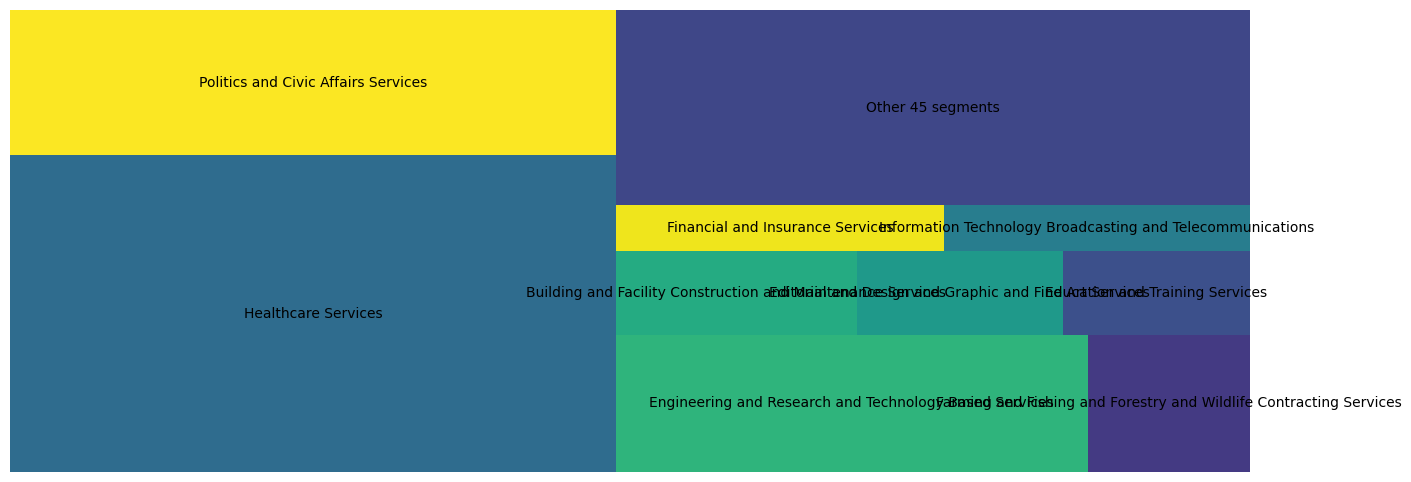

In [15]:
print(secopII_Master['Segment Name'].value_counts(normalize=True).head(5))

conteo_segmentos = secopII_Master['Segment Name'].value_counts()

#Juntar segmentos con pocas observaciones
conteo_segmentos[1:].to_frame()
conteo_segmentos['Other 45 segments'] = conteo_segmentos[10:].sum()
conteo_segmentos = conteo_segmentos.drop(index=conteo_segmentos[10:-1].index)

plt.figure(figsize=(16,6))
squarify.plot(sizes=conteo_segmentos[1:], label=conteo_segmentos.index[1:]             )
plt.axis('off')

# Análisis exploratorio
Se proceden a realizar estadísticos y gráficas para detectar la posible relación existente entre las variables explicativas y las variables respuesta.

In [16]:
path = 'created_data\SECOPII_Master_2.csv'
secopII_Master = pd.read_csv(path)
secopII_Master.shape

# Codigo Segmento Categoria Principal categórica
secopII_Master['Codigo Segmento Categoria Principal'] = secopII_Master['Codigo Segmento Categoria Principal'].astype('O')

In [17]:
secopII_Master.shape

(87027, 41)

In [18]:
secopII_Master.dtypes

ID Contrato                                 object
Nombre Entidad                              object
Sector                                      object
Entidad Centralizada                        object
Tipo de Contrato                            object
Modalidad de Contratacion                   object
Justificacion Modalidad de Contratacion     object
TipoDocProveedor                            object
Es Grupo                                    object
Es Pyme                                     object
Habilita Pago Adelantado                    object
Liquidación                                 object
Obligación Ambiental                        object
Valor del Contrato                           int64
Saldo CDP                                  float64
EsPostConflicto                             object
Destino Gasto                               object
Proveedores Invitados                      float64
Proveedores con Invitacion Directa         float64
Conteo de Respuestas a Ofertas 

Entidades a eliminar

In [19]:
secopII_Master[secopII_Master['Sector']=='interior']['Nombre Entidad'].unique()
#secopII_Master[secopII_Master['Sector']=='defensa']['Nombre Entidad'].unique()

array(['ALCALDÍA LOCAL DE CHAPINERO - FONDO DE DESARROLLO LOCAL'],
      dtype=object)

In [20]:
secopII_Master['Sector'].value_counts(normalize=True)

Salud y Protección Social           0.41
Servicio Público                    0.18
Cultura                             0.14
Ambiente y Desarrollo Sostenible    0.06
Vivienda, Ciudad y Territorio       0.04
Transporte                          0.04
No aplica/No pertenece              0.02
Educación Nacional                  0.02
Hacienda y Crédito Público          0.02
defensa                             0.02
Inclusión Social y Reconciliación   0.01
Planeación                          0.01
Industria                           0.01
Trabajo                             0.01
Ley de Justicia                     0.01
interior                            0.00
Name: Sector, dtype: float64

In [21]:
ent_excluir = ['INPEC - CARCEL Y PENITENCIARIA DE MEDIA SEGURIDAD DE BOGOTÁ', 
               'FONDO DE VIGILANCIA Y SEGURIDAD DE BOGOTÁ D.C EN LIQUIDACIÓN',
                'REGION ADMINISTRATIVA Y DE PLANEACION ESPECIAL - RAPE REGION CENTRAL',
                'COLEGIO DISTRITAL REPUBLICA DE COLOMBIA', 'CENTRAL ADMINISTRATIVA Y CONTABLE CENAC PERSONAL',
                'ESCUELA DE CADETES DE POLICIA GENERAL FRANCISCO DE PAULA SANTANDER'
              ]
print(secopII_Master['Nombre Entidad'].isin(ent_excluir).value_counts(normalize=True))

False   0.98
True    0.02
Name: Nombre Entidad, dtype: float64


In [22]:
#Eliminar obervaciones
secopII_Master = secopII_Master[~secopII_Master['Nombre Entidad'].isin(ent_excluir)]

In [23]:
secopII_Master.shape

(85443, 41)

Listados de variables 

In [24]:
#Variables independientes
vars_to_plot = ['Sector', 'Entidad Centralizada',
               'Tipo de Contrato', 'Modalidad de Contratacion',
               'Justificacion Modalidad de Contratacion', 'TipoDocProveedor',
               'Es Grupo', 'Es Pyme', 'Habilita Pago Adelantado', 'Liquidación',
               'Obligación Ambiental', 'Valor del Contrato', 'Saldo CDP',
               'EsPostConflicto', 'Destino Gasto', 'Proveedores Invitados',
               'Proveedores con Invitacion Directa', 'Conteo de Respuestas a Ofertas',
               'Numero_de_procesos_reportados',
               'Numero multas SIC proveedor', 'Valor acumulado multas SIC proveedor',
               'Tipo Empresa Proveedor', 'Dias Inicio-Firma Contrato',
               'Dias Fin-Inicio Contrato', 'Dias Inicio-Firma Ejecucion',
               'Dias Fin-Inicio Ejecucion', 'Dias Proveedor Inscrito',
               'Mes Firma Contrato', 'Proporcion pagada adelantado',
               'Saldo CDP respecto Valor', 'Grupo categoria principal',
               'Tipo Empresa Proveedor Resumido', 'Tiene_variables_portafolio',
               'Dias Proceso Contratacion Abierto', 'Mes de Publicacion del Proceso'
               ]

#Variables independientes categóricas
expl_cat = ['Sector', 'Entidad Centralizada',
           'Tipo de Contrato', 'Modalidad de Contratacion',
           'Justificacion Modalidad de Contratacion', 'TipoDocProveedor',
           'Es Grupo', 'Es Pyme', 'Habilita Pago Adelantado', 'Liquidación',
           'Obligación Ambiental', 'EsPostConflicto', 'Destino Gasto',
           'Codigo Segmento Categoria Principal', 'Tipo Empresa Proveedor',
           'Mes Firma Contrato', 'Grupo categoria principal',
           'Tipo Empresa Proveedor Resumido', 'Mes de Publicacion del Proceso'
           ]

#Variables independientes numéricas
expl_num = ['Valor del Contrato', 'Saldo CDP', 'Proveedores Invitados',
           'Proveedores con Invitacion Directa', 'Conteo de Respuestas a Ofertas',
           'Numero_de_procesos_reportados', 'Numero multas SIC proveedor',
           'Valor acumulado multas SIC proveedor', 'Dias Inicio-Firma Contrato',
           'Dias Fin-Inicio Contrato', 'Dias Inicio-Firma Ejecucion',
           'Dias Fin-Inicio Ejecucion', 'Dias Proveedor Inscrito',
           'Proporcion pagada adelantado', 'Saldo CDP respecto Valor',
           'Tiene_variables_portafolio', 'Dias Proceso Contratacion Abierto'
           ]



Funciones usadas para generar gráficos y tablas

In [25]:
#Funciones a usar

def difStatsTable(base, var_respuesta='Tuvo_adiciones', expl_num=expl_num):
    '''Genera una tabla para comparar las medias, medianas y desviaciones de variables explicativas numéricas
    y una variable respuesta
    Entrada: base: Base de datos de pandas con los datos a usar
             var_respuesta: variable de respuesta a usar
             expl_num: Usa la lista expl_num creada previamente para filtrar las variables numéricas.
    Salida: Tabla con estadísticas descriptivas'''
    statsByAdit = base[expl_num+[var_respuesta]].groupby(var_respuesta).agg(['mean','median','std'])
    display(pd.concat([statsByAdit,
                       statsByAdit.diff().iloc[1,:].to_frame().T.rename(index={1:'Diferencia porcentual'}
                                                                       )/statsByAdit.iloc[0,:]]
                     ))
    return

def plotAll2D(base, var_respuesta, vars_to_plot=vars_to_plot, show_box_fliers=False, normalize='index'):
    '''Genera gráfica para todas las variables a gráficar contra la variable explicativa, boxplot 
    si es numérica y heatmap si es categórica.
    Entrada: base: Base de datos de pandas con los datos a usar
             var_respuesta: variable de respuesta a usar
             expl_num: Usa la lista expl_num creada previamente para filtrar las variables numéricas.
             show_box_fliers: True o False dependiendo si se quieren ver los valores fuera de los bigotes en boxplots.
             normalize: Tipo de normalización a efectuar en la matríz de confusión. De acuerdo al parametro de pd.crosstab.
    Salida: Un gráfica con tantos subgráficas como variables en vars_to_plot
    '''
    nf = np.ceil(len(vars_to_plot)/2)
    plt.figure(figsize=(18,8*nf))
    plt.subplots_adjust(hspace=2)

    for i, var in enumerate(vars_to_plot):
        plt.subplot(nf,2,i+1)
        if base[var].dtype=='O':
            cross = pd.crosstab(base[var_respuesta], base[var], normalize='index' )
            sns.heatmap( cross , cmap='YlGnBu', annot=True, annot_kws={'rotation': 90})
        else:
            sns.boxplot(x=var_respuesta, y=var, data=base, showfliers = show_box_fliers)

        plt.title(var, fontsize=16)
    plt.show()  
    
    return
    


## Sin discriminar tipo de contrato


Calculo del grado de correlación entre las diversas variables explicativas y las variables respuesta. En el caso de las variables explicativas numéricas se usa la correlación de pearson usual.Y para las variables categóricas se usa la V de cramer, que se calcula en base al estadístico de la prueba chi cuadrado de independencia, la cual se interpreta de manera similar.

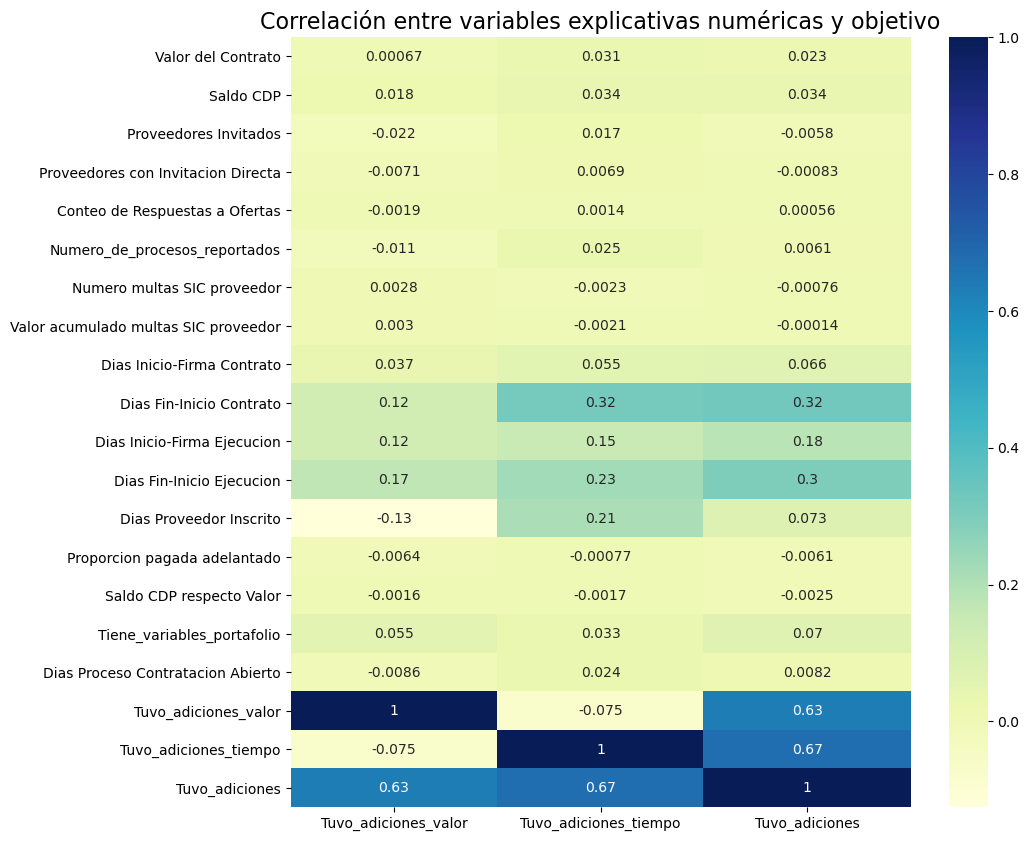

In [26]:
#Para variables numéricas
plt.figure(figsize=(10,10))
sns.heatmap(secopII_Master.corr()[['Tuvo_adiciones_valor', 'Tuvo_adiciones_tiempo', 'Tuvo_adiciones']], 
            annot=True, cmap='YlGnBu')
plt.title('Correlación entre variables explicativas numéricas y objetivo', fontsize=16)
plt.show()

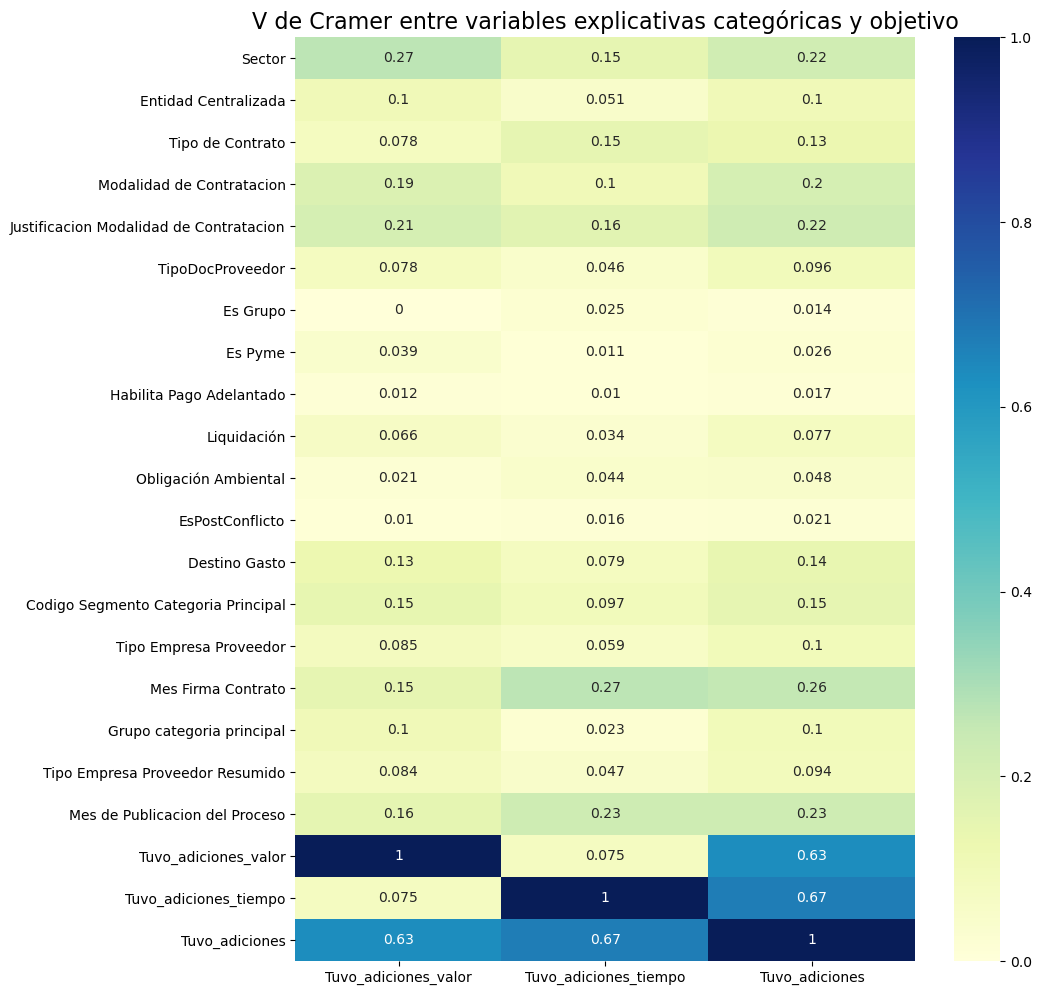

In [27]:
#Para variables categóricas usando la V de cramer
catcorrM = corrcat.corr_matrix(secopII_Master, 
                               columns=expl_cat+['Tuvo_adiciones_valor', 'Tuvo_adiciones_tiempo', 'Tuvo_adiciones'] )
plt.figure(figsize=(10,12))
sns.heatmap(catcorrM[['Tuvo_adiciones_valor', 'Tuvo_adiciones_tiempo', 'Tuvo_adiciones']],
           annot=True, cmap='YlGnBu')
plt.title('V de Cramer entre variables explicativas categóricas y objetivo', fontsize=16)
plt.show()

del catcorrM

### Presencia de adiciones
Relación entre presencia de adiciones y demás variables explicativas.

In [ ]:
plotAll2D(secopII_Master,'Tuvo_adiciones')  

for var in ['Valor del Contrato', 'Saldo CDP']:
    sns.catplot(x='Tuvo_adiciones', y=var, data=secopII_Master)
    plt.show()

In [29]:
#Estadísticos de variables numéricas por presencia de adiciones
difStatsTable(secopII_Master, 'Tuvo_adiciones')

Valor del Contrato                            \
                                    mean      median           std   
0                            58837538.86 17545621.00  615472906.48   
1                            99093103.35 25677849.00 1107874666.73   
Diferencia porcentual               0.68        0.46          0.80   

                          Saldo CDP                             \
                               mean      median            std   
0                     3161812988.25 19080020.00 57961084002.72   
1                     6699082381.21 37199472.00 28018419543.90   
Diferencia porcentual          1.12        0.95          -0.52   

                      Proveedores Invitados               \
                                       mean median   std   
0                                      5.69   0.00 35.33   
1                                      5.27   0.00 32.89   
Diferencia porcentual                 -0.07    NaN -0.07   

                      Proveedores con Invitacion Directa              \
                                                    mean median  std   
0                                                   0.15   0.00 1.94   
1                                                   0.15   0.00 2.34   
Diferencia porcentual                              -0.02    NaN 0.20   

                      Conteo de Respuestas a Ofertas               \
                                                mean median   std   
0                                               0.02   0.00  0.76   
1                                               0.02   0.00  0.56   
Diferencia porcentual                           0.05    NaN -0.25   

                      Numero_de_procesos_reportados              \
                                               mean median  std   
0                                              1.03   1.00 0.18   
1                                              1.03   1.00 0.18   
Diferencia porcentual                          0.00   0.00 0.03   

                      Numero multas SIC proveedor              \
                                             mean median  std   
0                                            0.22   0.00 6.95   
1                                            0.21   0.00 7.54   
Diferencia porcentual                       -0.05    NaN 0.09   

                      Valor acumulado multas SIC proveedor         \
                                                      mean median   
0                                              13821305.11   0.00   
1                                              13659380.35   0.00   
Diferencia porcentual                                -0.01    NaN   

                                   Dias Inicio-Firma Contrato               \
                               std                       mean median   std   
0                     522527298.74                     -11.16   0.00 40.78   
1                     544531317.01                      -6.02  -1.00 27.73   
Diferencia porcentual         0.04                      -0.46   -inf -0.32   

                      Dias Fin-Inicio Contrato                \
                                          mean median    std   
0                                       181.59 154.00 119.58   
1                                       269.84 303.00 127.67   
Diferencia porcentual                     0.49   0.97   0.07   

                      Dias Inicio-Firma Ejecucion               \
                                             mean median   std   
0                                           -8.73   0.00 47.65   
1                                           11.70   0.00 58.93   
Diferencia porcentual                       -2.34    NaN  0.24   

                      Dias Fin-Inicio Ejecucion                \
                                           mean median    std   
0                                        178.60 152.00 118.42   
1                                        260.54 273.00 131.82   
Diferencia porcentual

### Presencia de adiciones en valor
Relación entre presencia de adiciones en valor y demás variables explicativas.

In [ ]:
plotAll2D(secopII_Master,'Tuvo_adiciones_valor')

for var in ['Valor del Contrato', 'Saldo CDP']:
    sns.catplot(x='Tuvo_adiciones_valor', y=var, data=secopII_Master)
    plt.show()

In [31]:
#Estadísticos de variables numéricas por presencia de adiciones en valor
difStatsTable(secopII_Master, 'Tuvo_adiciones_valor')

Valor del Contrato                           \
                                    mean      median          std   
0                            72267903.27 19500000.00 856319331.71   
1                            73727317.33 23486400.00 591356263.45   
Diferencia porcentual               0.02        0.20        -0.31   

                          Saldo CDP                             \
                               mean      median            std   
0                     3954562023.69 23211727.50 52630955864.35   
1                     6343200658.43 21068709.00 33408365328.22   
Diferencia porcentual          0.60       -0.09          -0.37   

                      Proveedores Invitados               \
                                       mean median   std   
0                                      5.89   0.00 35.68   
1                                      3.92   0.00 28.30   
Diferencia porcentual                 -0.33    NaN -0.21   

                      Proveedores con Invitacion Directa               \
                                                    mean median   std   
0                                                   0.16   0.00  2.13   
1                                                   0.12   0.00  1.87   
Diferencia porcentual                              -0.25    NaN -0.12   

                      Conteo de Respuestas a Ofertas               \
                                                mean median   std   
0                                               0.02   0.00  0.75   
1                                               0.01   0.00  0.38   
Diferencia porcentual                          -0.21    NaN -0.49   

                      Numero_de_procesos_reportados               \
                                               mean median   std   
0                                              1.03   1.00  0.18   
1                                              1.03   1.00  0.17   
Diferencia porcentual                         -0.01   0.00 -0.08   

                      Numero multas SIC proveedor              \
                                             mean median  std   
0                                            0.21   0.00 6.98   
1                                            0.26   0.00 7.96   
Diferencia porcentual                        0.26    NaN 0.14   

                      Valor acumulado multas SIC proveedor         \
                                                      mean median   
0                                              13039746.99   0.00   
1                                              17279101.04   0.00   
Diferencia porcentual                                 0.33    NaN   

                                   Dias Inicio-Firma Contrato               \
                               std                       mean median   std   
0                     521825109.65                     -10.04   0.00 37.27   
1                     568442871.23                      -6.41  -1.00 35.19   
Diferencia porcentual         0.09                      -0.36   -inf -0.06   

                      Dias Fin-Inicio Contrato                \
                                          mean median    std   
0                                       204.55 180.00 128.74   
1                                       245.59 269.00 126.73   
Diferencia porcentual                     0.20   0.49  -0.02   

                      Dias Inicio-Firma Ejecucion               \
                                             mean median   std   
0                                           -4.67   0.00 49.85   
1                                           12.17   0.00 62.66   
Diferencia porcentual                       -3.60    NaN  0.26   

                      Dias Fin-Inicio Ejecucion                \
                                           mean median    std   
0                                        196.32 180.00 125.39   
1                                        255.42 268.00 135.47   
Diferencia porce

In [ ]:
fig = px.histogram(secopII_Master, x = "Sector", color = "Tuvo_adiciones_valor", barmode = "group")
fig.show()

In [ ]:
fig = px.histogram(secopII_Master, x = "Valor del Contrato", color = "Tuvo_adiciones_valor", range_x 
 = [0, 0.2e9], barmode = "group", histnorm = "probability")
fig.show()

In [ ]:
fig = px.histogram(secopII_Master, x = "Saldo CDP", color = "Tuvo_adiciones_valor", range_x 
 = [0, 1e10], barmode = "group", histnorm = "probability")
fig.show()

In [ ]:
secopII_Master["Saldo CDP"].describe()

count           85443.00
mean       4363920725.15
std       49873545243.82
min                 0.00
25%                 0.00
50%          22994003.00
75%          86566667.00
max     3300000000000.00
Name: Saldo CDP, dtype: float64

In [ ]:
fig = px.histogram(secopII_Master, x = "Entidad Centralizada", color = "Tuvo_adiciones_valor", barmode = "group",
                  histnorm = "probability")
fig.show()

In [ ]:
fig = px.histogram(secopII_Master, x = "Mes Firma Contrato", color = "Tuvo_adiciones_valor", barmode = "group",
                  histnorm = "probability",
                  category_orders={"Mes Firma Contrato":
                                   ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']}
                  )
fig.show()

In [ ]:
fig = px.histogram(secopII_Master, x = "Modalidad de Contratacion", color = "Tuvo_adiciones_valor", barmode = "group",
                  histnorm = "probability")
fig.show()

In [ ]:
fig = px.histogram(secopII_Master, x = "Mes de Publicacion del Proceso", color = "Tuvo_adiciones_valor", barmode = "group",
                  histnorm = "probability",
                  category_orders={"Mes Firma Contrato":
                                   ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']}
                  )
fig.show()

### Presencia de adiciones en tiempo
Relación entre presencia de adiciones en tiempo y demás variables explicativas.

In [ ]:
plotAll2D(secopII_Master,'Tuvo_adiciones_tiempo')

for var in ['Valor del Contrato', 'Saldo CDP']:
    sns.catplot(x='Tuvo_adiciones_tiempo', y=var, data=secopII_Master)
    plt.show()

In [ ]:
#Estadísticos de variables numéricas por presencia de adiciones en valor
difStatsTable(secopII_Master, 'Tuvo_adiciones_tiempo')

Valor del Contrato                            \
                                    mean      median           std   
0                            60206152.90 18720000.00  609338423.43   
1                           125058032.39 29412000.00 1388687119.54   
Diferencia porcentual               1.08        0.57          1.28   

                          Saldo CDP                             \
                               mean      median            std   
0                     3533934638.84 18800000.00 54292221562.26   
1                     7905829168.92 51636367.00 22533404383.59   
Diferencia porcentual          1.24        1.75          -0.58   

                      Proveedores Invitados               \
                                       mean median   std   
0                                      5.25   0.00 33.87   
1                                      6.76   0.00 36.99   
Diferencia porcentual                  0.29    NaN  0.09   

                      Proveedores con Invitacion Directa              \
                                                    mean median  std   
0                                                   0.14   0.00 1.90   
1                                                   0.18   0.00 2.74   
Diferencia porcentual                               0.26    NaN 0.44   

                      Conteo de Respuestas a Ofertas               \
                                                mean median   std   
0                                               0.02   0.00  0.70   
1                                               0.02   0.00  0.67   
Diferencia porcentual                           0.15    NaN -0.05   

                      Numero_de_procesos_reportados              \
                                               mean median  std   
0                                              1.03   1.00 0.17   
1                                              1.04   1.00 0.20   
Diferencia porcentual                          0.01   0.00 0.17   

                      Numero multas SIC proveedor               \
                                             mean median   std   
0                                            0.22   0.00  7.16   
1                                            0.18   0.00  7.12   
Diferencia porcentual                       -0.19    NaN -0.01   

                      Valor acumulado multas SIC proveedor         \
                                                      mean median   
0                                              14295103.04   0.00   
1                                              11509545.68   0.00   
Diferencia porcentual                                -0.19    NaN   

                                   Dias Inicio-Firma Contrato               \
                               std                       mean median   std   
0                     532523453.87                     -10.40   0.00 40.17   
1                     519665058.14                      -5.21   0.00 16.82   
Diferencia porcentual        -0.02                      -0.50    NaN -0.58   

                      Dias Fin-Inicio Contrato                \
                                          mean median    std   
0                                       191.44 173.00 122.03   
1                                       297.52 330.00 124.27   
Diferencia porcentual                     0.55   0.91   0.02   

                      Dias Inicio-Firma Ejecucion               \
                                             mean median   std   
0                                           -5.55   0.00 50.00   
1                                           14.29   1.00 60.15   
Diferencia porcentual                       -3.57    inf  0.20   

                      Dias Fin-Inicio Ejecucion                \
                                           mean median    std   
0                                        192.26 167.00 124.89   
1                                        266.98 288.00 129.33   
Diferencia porce

## Contratos diferentes a prestación de servicios
Relación entre variables de adiciones y explicativas excluyendo prestación de servicios.
Se conservan aquellas observaciones en las cuales la modalidad de contratación no es "Prestación de servicios".

In [ ]:
secopII_NoPS = secopII_Master[secopII_Master['Tipo de Contrato']!='Prestación de servicios']
secopII_NoPS.shape

(9714, 41)

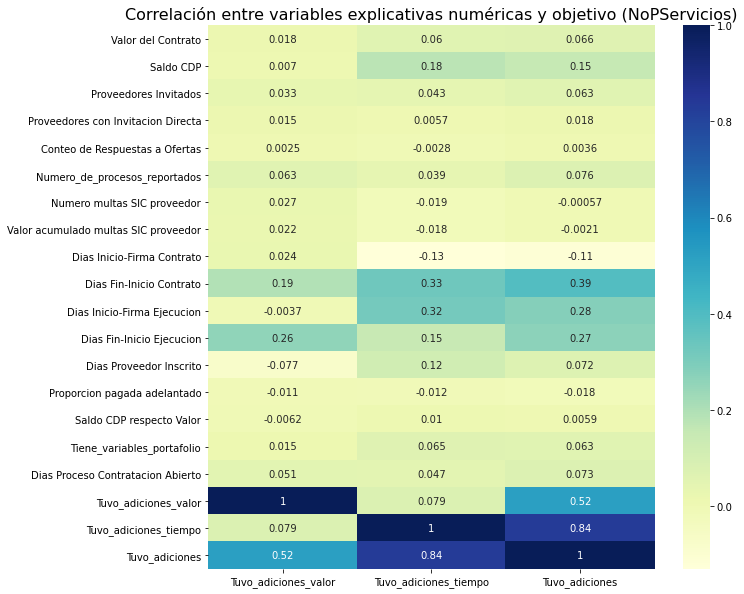

In [ ]:
#Para variables numéricas
plt.figure(figsize=(10,10))
sns.heatmap(secopII_NoPS.corr()[['Tuvo_adiciones_valor', 'Tuvo_adiciones_tiempo', 'Tuvo_adiciones']], 
            annot=True, cmap='YlGnBu')
plt.title('Correlación entre variables explicativas numéricas y objetivo (NoPServicios)', fontsize=16)
plt.show()

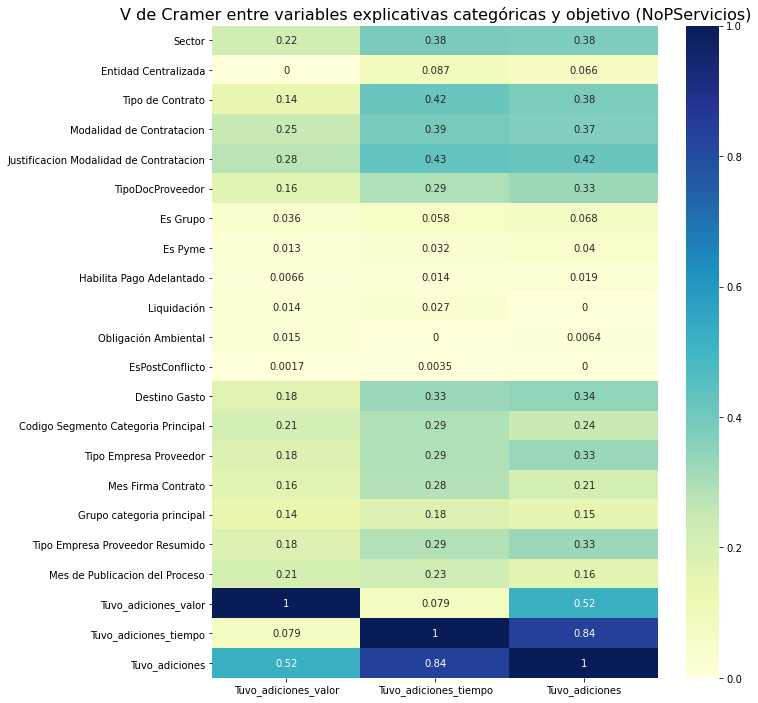

In [ ]:
#Para variables categóricas usando la V de cramer
catcorrM = corrcat.corr_matrix(secopII_NoPS, 
                               columns=expl_cat+['Tuvo_adiciones_valor', 'Tuvo_adiciones_tiempo', 'Tuvo_adiciones'] )
plt.figure(figsize=(10,12))
sns.heatmap(catcorrM[['Tuvo_adiciones_valor', 'Tuvo_adiciones_tiempo', 'Tuvo_adiciones']],
           annot=True, cmap='YlGnBu')
plt.title('V de Cramer entre variables explicativas categóricas y objetivo (NoPServicios)', fontsize=16)
plt.show()

del catcorrM

### Presencia de adiciones
Relación entre presencia de adiciones y demás variables explicativas.

In [ ]:
print('No Prestación de Servicios')
plotAll2D(secopII_NoPS,'Tuvo_adiciones')

for var in ['Valor del Contrato', 'Saldo CDP']:
    sns.catplot(x='Tuvo_adiciones', y=var, data=secopII_NoPS)
    plt.show()

In [ ]:
print('No Prestación de Servicios')
difStatsTable(secopII_NoPS, 'Tuvo_adiciones')

No Prestación de Servicios


Valor del Contrato                            \
                                    mean      median           std   
0                           250343538.74  8826830.00 1730596862.22   
1                           597392619.27 26564085.50 3524756119.31   
Diferencia porcentual               1.39        2.01          1.04   

                          Saldo CDP                             \
                               mean      median            std   
0                      506997047.59        0.00  2673195605.36   
1                     4299817280.74 89902956.50 20289392335.38   
Diferencia porcentual          7.48         inf           6.59   

                      Proveedores Invitados               \
                                       mean median   std   
0                                     28.66   0.00 81.60   
1                                     40.36   0.00 90.47   
Diferencia porcentual                  0.41    NaN  0.11   

                      Proveedores con Invitacion Directa              \
                                                    mean median  std   
0                                                   0.34   0.00 3.15   
1                                                   0.48   0.00 4.51   
Diferencia porcentual                               0.41    NaN 0.43   

                      Conteo de Respuestas a Ofertas               \
                                                mean median   std   
0                                               0.12   0.00  2.14   
1                                               0.14   0.00  1.58   
Diferencia porcentual                           0.13    NaN -0.26   

                      Numero_de_procesos_reportados              \
                                               mean median  std   
0                                              1.17   1.00 0.37   
1                                              1.23   1.00 0.42   
Diferencia porcentual                          0.06   0.00 0.13   

                      Numero multas SIC proveedor               \
                                             mean median   std   
0                                            1.42   0.00 18.39   
1                                            1.39   0.00 14.79   
Diferencia porcentual                       -0.02    NaN -0.20   

                      Valor acumulado multas SIC proveedor         \
                                                      mean median   
0                                              89443113.06   0.00   
1                                              83474680.72   0.00   
Diferencia porcentual                                -0.07    NaN   

                                    Dias Inicio-Firma Contrato               \
                                std                       mean median   std   
0                     1414036481.44                      -6.55   1.00 34.03   
1                      990963007.54                     -15.23  -1.00 34.08   
Diferencia porcentual         -0.30                       1.33  -2.00  0.00   

                      Dias Fin-Inicio Contrato                \
                                          mean median    std   
0                                       110.11  59.00 137.64   
1                                       247.74 206.00 163.57   
Diferencia porcentual                     1.25   2.49   0.19   

                      Dias Inicio-Firma Ejecucion               \
                                             mean median   std   
0                                           -4.18   1.00 38.35   
1                                           30.44   3.00 79.51   
Diferencia porcentual                       -8.28   2.00  1.07   

                      Dias Fin-Inicio Ejecucion                \
                                           mean median    std   
0                                        107.49  59.00 129.03   
1                                        194.52 125.50 169.90   
Diferencia 

### Presencia de adiciones en valor
Relación entre presencia de adiciones en valor y demás variables explicativas.

In [ ]:
print('No Prestación de Servicios')
plotAll2D(secopII_NoPS,'Tuvo_adiciones_valor')

for var in ['Valor del Contrato', 'Saldo CDP']:
    sns.catplot(x='Tuvo_adiciones_valor', y=var, data=secopII_NoPS)
    plt.show()

In [ ]:
print('No Prestación de Servicios')
difStatsTable(secopII_NoPS, 'Tuvo_adiciones_valor')

No Prestación de Servicios


Valor del Contrato                            \
                                    mean      median           std   
0                           335632518.25 11611472.00 2407993182.18   
1                           477759000.91 34850969.00 2227230409.63   
Diferencia porcentual               0.42        2.00         -0.08   

                          Saldo CDP                             \
                               mean      median            std   
0                     1566602995.12        0.00  9800669763.31   
1                     1828363238.98 25697000.00 19947294095.14   
Diferencia porcentual          0.17         inf           1.04   

                      Proveedores Invitados               \
                                       mean median   std   
0                                     31.17   0.00 83.39   
1                                     40.45   1.00 93.19   
Diferencia porcentual                  0.30    inf  0.12   

                      Proveedores con Invitacion Directa              \
                                                    mean median  std   
0                                                   0.36   0.00 3.60   
1                                                   0.55   0.00 3.66   
Diferencia porcentual                               0.51    NaN 0.02   

                      Conteo de Respuestas a Ofertas               \
                                                mean median   std   
0                                               0.13   0.00  2.07   
1                                               0.14   0.00  1.09   
Diferencia porcentual                           0.13    NaN -0.47   

                      Numero_de_procesos_reportados              \
                                               mean median  std   
0                                              1.18   1.00 0.38   
1                                              1.26   1.00 0.44   
Diferencia porcentual                          0.07   0.00 0.15   

                      Numero multas SIC proveedor               \
                                             mean median   std   
0                                            1.25   0.00 16.94   
1                                            2.83   0.00 21.43   
Diferencia porcentual                        1.26    NaN  0.27   

                      Valor acumulado multas SIC proveedor         \
                                                      mean median   
0                                              78019898.04   0.00   
1                                             176427477.59   0.00   
Diferencia porcentual                                 1.26    NaN   

                                    Dias Inicio-Firma Contrato               \
                                std                       mean median   std   
0                     1290226425.63                      -9.31   0.00 33.82   
1                     1448698892.68                      -6.51   0.00 38.04   
Diferencia porcentual          0.12                      -0.30    NaN  0.12   

                      Dias Fin-Inicio Contrato                \
                                          mean median    std   
0                                       139.31  89.00 156.67   
1                                       242.58 198.00 141.49   
Diferencia porcentual                     0.74   1.22  -0.10   

                      Dias Inicio-Firma Ejecucion               \
                                             mean median   std   
0                                            5.79   1.00 56.65   
1                                            5.10   1.00 46.23   
Diferencia porcentual                       -0.12   0.00 -0.18   

                      Dias Fin-Inicio Ejecucion                \
                                           mean median    std   
0                                        119.76  60.00 140.79   
1                                        247.81 198.00 154.80   
Diferencia 

### Presencia de adiciones en tiempo
Relación entre presencia de adiciones en tiempo y demás variables explicativas.

In [ ]:
print('No Prestación de Servicios')
plotAll2D(secopII_NoPS,'Tuvo_adiciones_tiempo')

for var in ['Valor del Contrato', 'Saldo CDP']:
    sns.catplot(x='Tuvo_adiciones_tiempo', y=var, data=secopII_NoPS)
    plt.show()

In [ ]:
print('No Prestación de Servicios')
difStatsTable(secopII_NoPS, 'Tuvo_adiciones_tiempo')

No Prestación de Servicios


Valor del Contrato                            \
                                    mean      median           std   
0                           273100443.91 10951384.50 1810514487.08   
1                           622929167.83 20000000.00 3785793712.84   
Diferencia porcentual               1.28        0.83          1.09   

                          Saldo CDP                              \
                               mean       median            std   
0                      534182949.08         0.00  3037052561.08   
1                     5369534031.43 179052343.50 22888814009.07   
Diferencia porcentual          9.05          inf           6.54   

                      Proveedores Invitados               \
                                       mean median   std   
0                                     30.11   0.00 83.49   
1                                     38.89   0.00 87.41   
Diferencia porcentual                  0.29    NaN  0.05   

                      Proveedores con Invitacion Directa              \
                                                    mean median  std   
0                                                   0.37   0.00 3.26   
1                                                   0.42   0.00 4.59   
Diferencia porcentual                               0.13    NaN 0.41   

                      Conteo de Respuestas a Ofertas               \
                                                mean median   std   
0                                               0.13   0.00  2.08   
1                                               0.12   0.00  1.65   
Diferencia porcentual                          -0.10    NaN -0.21   

                      Numero_de_procesos_reportados              \
                                               mean median  std   
0                                              1.18   1.00 0.38   
1                                              1.21   1.00 0.41   
Diferencia porcentual                          0.03   0.00 0.08   

                      Numero multas SIC proveedor               \
                                             mean median   std   
0                                            1.59   0.00 18.99   
1                                            0.78   0.00 10.08   
Diferencia porcentual                       -0.51    NaN -0.47   

                      Valor acumulado multas SIC proveedor         \
                                                      mean median   
0                                             100437302.57   0.00   
1                                              42398827.12   0.00   
Diferencia porcentual                                -0.58    NaN   

                                    Dias Inicio-Firma Contrato               \
                                std                       mean median   std   
0                     1434064550.34                      -6.66   0.00 34.58   
1                      680147449.69                     -17.50  -2.00 31.71   
Diferencia porcentual         -0.53                       1.63   -inf -0.08   

                      Dias Fin-Inicio Contrato                \
                                          mean median    std   
0                                       121.90  60.00 141.82   
1                                       248.02 196.00 173.90   
Diferencia porcentual                     1.03   2.27   0.23   

                      Dias Inicio-Firma Ejecucion               \
                                             mean median   std   
0                                           -3.60   1.00 39.21   
1                                           39.02   5.00 85.31   
Diferencia porcentual                      -11.83   4.00  1.18   

                      Dias Fin-Inicio Ejecucion                \
                                           mean median    std   
0                                        120.84  60.00 137.61   
1                                        173.65 107.00 171.30   
Difere

## Contratos de prestación de servicios
Relación entre variables de adiciones y explicativas incluyendo solo contratos de prestación de servicios.
Se conservan aquellas observaciones en las cuales la modalidad de contratación es "Prestación de servicios".

In [ ]:
secopII_PServicios = secopII_Master[secopII_Master['Tipo de Contrato']=='Prestación de servicios']
secopII_PServicios.drop(columns='Tipo de Contrato')
print(secopII_PServicios.shape)

#Dado que queda un único valor para tipo de contrato eliminar variables
expl_cat_NoTipoContrato = [var for var in expl_cat if var!='Tipo de Contrato']

(75729, 41)


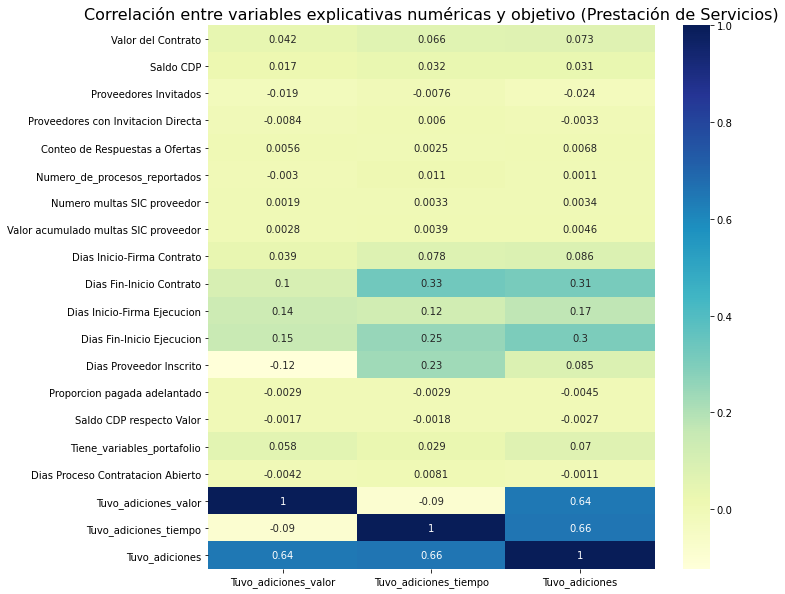

In [ ]:
#Para variables numéricas
plt.figure(figsize=(10,10))
sns.heatmap(secopII_PServicios.corr()[['Tuvo_adiciones_valor', 'Tuvo_adiciones_tiempo', 'Tuvo_adiciones']], 
            annot=True, cmap='YlGnBu')
plt.title('Correlación entre variables explicativas numéricas y objetivo (Prestación de Servicios)', fontsize=16)
plt.show()

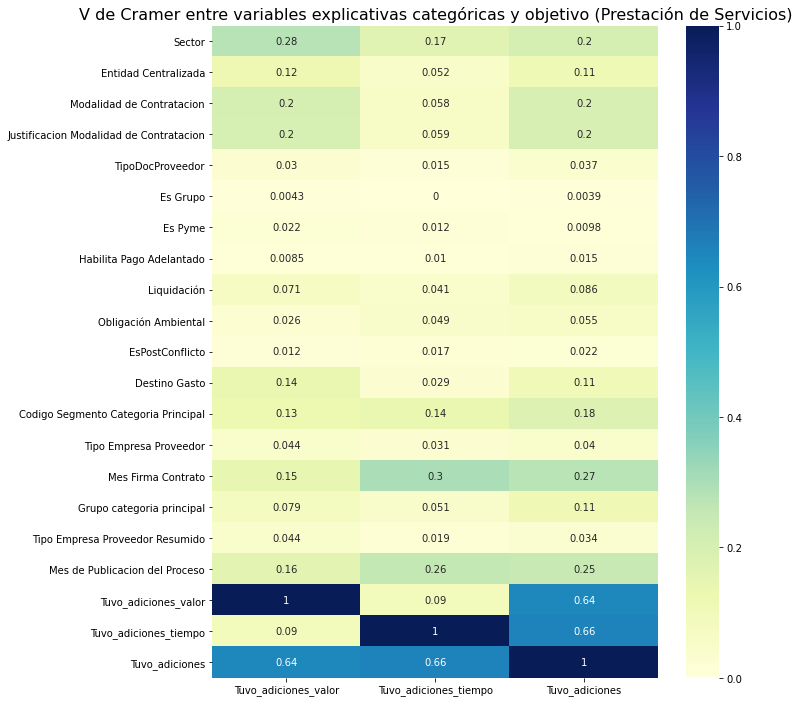

In [ ]:
#Para variables categóricas usando la V de cramer
catcorrM = corrcat.corr_matrix(secopII_PServicios, 
                               columns=expl_cat_NoTipoContrato+['Tuvo_adiciones_valor', 'Tuvo_adiciones_tiempo', 'Tuvo_adiciones'] )
plt.figure(figsize=(10,12))
sns.heatmap(catcorrM[['Tuvo_adiciones_valor', 'Tuvo_adiciones_tiempo', 'Tuvo_adiciones']],
           annot=True, cmap='YlGnBu')
plt.title('V de Cramer entre variables explicativas categóricas y objetivo (Prestación de Servicios)', fontsize=16)
plt.show()

del catcorrM

### Presencia de adiciones

In [ ]:
print('Solo Prestación de Servicios')
plotAll2D(secopII_PServicios,'Tuvo_adiciones')

for var in ['Valor del Contrato', 'Saldo CDP']:
    sns.catplot(x='Tuvo_adiciones', y=var, data=secopII_PServicios)
    plt.show()

In [ ]:
print('Solo Prestación de Servicios')
difStatsTable(secopII_PServicios, 'Tuvo_adiciones')

Solo Prestación de Servicios


Valor del Contrato                           \
                                    mean      median          std   
0                            31996040.58 18098848.00  79486524.12   
1                            46334880.62 25610000.00 115289950.85   
Diferencia porcentual               0.45        0.42         0.45   

                          Saldo CDP                             \
                               mean      median            std   
0                     3533912230.91 20638000.00 61872732470.16   
1                     6953108240.19 35927647.00 28703769098.59   
Diferencia porcentual          0.97        0.74          -0.54   

                      Proveedores Invitados               \
                                       mean median   std   
0                                      2.50   0.00 20.38   
1                                      1.59   0.00 13.93   
Diferencia porcentual                 -0.37    NaN -0.32   

                      Proveedores con Invitacion Directa              \
                                                    mean median  std   
0                                                   0.12   0.00 1.71   
1                                                   0.11   0.00 1.97   
Diferencia porcentual                              -0.10    NaN 0.15   

                      Conteo de Respuestas a Ofertas              \
                                                mean median  std   
0                                               0.00   0.00 0.12   
1                                               0.00   0.00 0.30   
Diferencia porcentual                           2.24    NaN 1.52   

                      Numero_de_procesos_reportados              \
                                               mean median  std   
0                                              1.01   1.00 0.12   
1                                              1.01   1.00 0.12   
Diferencia porcentual                          0.00   0.00 0.01   

                      Numero multas SIC proveedor              \
                                             mean median  std   
0                                            0.05   0.00 2.73   
1                                            0.08   0.00 6.29   
Diferencia porcentual                        0.57    NaN 1.31   

                      Valor acumulado multas SIC proveedor         \
                                                      mean median   
0                                               3222145.66   0.00   
1                                               6267578.74   0.00   
Diferencia porcentual                                 0.95    NaN   

                                   Dias Inicio-Firma Contrato               \
                               std                       mean median   std   
0                     173709557.13                     -11.81   0.00 41.60   
1                     472652745.01                      -5.04  -1.00 26.78   
Diferencia porcentual         1.72                      -0.57   -inf -0.36   

                      Dias Fin-Inicio Contrato                \
                                          mean median    std   
0                                       191.61 170.00 113.28   
1                                       272.18 309.00 123.03   
Diferencia porcentual                     0.42   0.82   0.09   

                      Dias Inicio-Firma Ejecucion               \
                                             mean median   std   
0                                           -9.37   0.00 48.78   
1                                            9.72   0.00 55.94   
Diferencia porcentual                       -2.04    NaN  0.15   

                      Dias Fin-Inicio Ejecucion                \
                                           mean median    std   
0                                        188.57 162.00 113.35   
1                                        267.53 289.00 125.11   
Diferencia porcentual          

### Presencia de adiciones en tiempo

In [ ]:
print('Solo Prestación de Servicios')
plotAll2D(secopII_PServicios,'Tuvo_adiciones_tiempo')

for var in ['Valor del Contrato', 'Saldo CDP']:
    sns.catplot(x='Tuvo_adiciones_tiempo', y=var, data=secopII_PServicios)
    plt.show()

In [ ]:
print('Solo Prestación de Servicios')
difStatsTable(secopII_PServicios, 'Tuvo_adiciones_tiempo')

Solo Prestación de Servicios


Valor del Contrato                           \
                                    mean      median          std   
0                            33995913.74 18994368.00  84984111.79   
1                            49962322.28 30000000.00 124089481.26   
Diferencia porcentual               0.47        0.58         0.46   

                          Saldo CDP                             \
                               mean      median            std   
0                     3903245665.57 20000000.00 57516671806.43   
1                     8288387768.58 49500000.00 22455280414.29   
Diferencia porcentual          1.12        1.48          -0.61   

                      Proveedores Invitados               \
                                       mean median   std   
0                                      2.25   0.00 18.98   
1                                      1.89   0.00 15.41   
Diferencia porcentual                 -0.16    NaN -0.19   

                      Proveedores con Invitacion Directa              \
                                                    mean median  std   
0                                                   0.11   0.00 1.66   
1                                                   0.14   0.00 2.33   
Diferencia porcentual                               0.24    NaN 0.41   

                      Conteo de Respuestas a Ofertas              \
                                                mean median  std   
0                                               0.00   0.00 0.16   
1                                               0.00   0.00 0.31   
Diferencia porcentual                           0.63    NaN 0.90   

                      Numero_de_procesos_reportados              \
                                               mean median  std   
0                                              1.01   1.00 0.12   
1                                              1.02   1.00 0.13   
Diferencia porcentual                          0.00   0.00 0.11   

                      Numero multas SIC proveedor              \
                                             mean median  std   
0                                            0.06   0.00 3.60   
1                                            0.09   0.00 6.56   
Diferencia porcentual                        0.63    NaN 0.82   

                      Valor acumulado multas SIC proveedor         \
                                                      mean median   
0                                               3689803.85   0.00   
1                                               6850403.27   0.00   
Diferencia porcentual                                 0.86    NaN   

                                   Dias Inicio-Firma Contrato               \
                               std                       mean median   std   
0                     253592299.45                     -10.86   0.00 40.78   
1                     490789227.94                      -3.35   0.00 12.15   
Diferencia porcentual         0.94                      -0.69    NaN -0.70   

                      Dias Fin-Inicio Contrato                \
                                          mean median    std   
0                                       200.00 180.00 116.53   
1                                       304.98 339.00 113.08   
Diferencia porcentual                     0.52   0.88  -0.03   

                      Dias Inicio-Firma Ejecucion               \
                                             mean median   std   
0                                           -5.79   0.00 51.16   
1                                           10.56   1.00 54.41   
Diferencia porcentual                       -2.82    inf  0.06   

                      Dias Fin-Inicio Ejecucion                \
                                           mean median    std   
0                                        201.06 180.00 120.33   
1                                        281.05 303.00 115.39   
Diferencia porcentual          

### Presencia de adiciones en valor

In [ ]:
print('Solo Prestación de Servicios')
plotAll2D(secopII_PServicios,'Tuvo_adiciones_valor')

for var in ['Valor del Contrato', 'Saldo CDP']:
    sns.catplot(x='Tuvo_adiciones_valor', y=var, data=secopII_PServicios)
    plt.show()

In [ ]:
print('Solo Prestación de Servicios')
difStatsTable(secopII_PServicios, 'Tuvo_adiciones_valor')

Solo Prestación de Servicios


Valor del Contrato                           \
                                    mean      median          std   
0                            35105243.84 19752000.00  86411516.28   
1                            45412030.53 23000000.00 121083129.71   
Diferencia porcentual               0.29        0.16         0.40   

                          Saldo CDP                             \
                               mean      median            std   
0                     4291520381.25 24750000.00 56092982953.45   
1                     6659608805.56 20403000.00 34131471736.21   
Diferencia porcentual          0.55       -0.18          -0.39   

                      Proveedores Invitados               \
                                       mean median   std   
0                                      2.35   0.00 19.38   
1                                      1.44   0.00 12.99   
Diferencia porcentual                 -0.39    NaN -0.33   

                      Proveedores con Invitacion Directa               \
                                                    mean median   std   
0                                                   0.13   0.00  1.83   
1                                                   0.09   0.00  1.68   
Diferencia porcentual                              -0.31    NaN -0.08   

                      Conteo de Respuestas a Ofertas              \
                                                mean median  std   
0                                               0.00   0.00 0.18   
1                                               0.00   0.00 0.26   
Diferencia porcentual                           1.66    NaN 0.45   

                      Numero_de_procesos_reportados               \
                                               mean median   std   
0                                              1.01   1.00  0.12   
1                                              1.01   1.00  0.11   
Diferencia porcentual                         -0.00   0.00 -0.03   

                      Numero multas SIC proveedor              \
                                             mean median  std   
0                                            0.06   0.00 3.86   
1                                            0.08   0.00 5.93   
Diferencia porcentual                        0.35    NaN 0.53   

                      Valor acumulado multas SIC proveedor         \
                                                      mean median   
0                                               3870575.86   0.00   
1                                               6125688.80   0.00   
Diferencia porcentual                                 0.58    NaN   

                                   Dias Inicio-Firma Contrato               \
                               std                       mean median   std   
0                     274171277.68                     -10.14   0.00 37.73   
1                     443773128.56                      -6.41  -1.00 34.98   
Diferencia porcentual         0.62                      -0.37   -inf -0.07   

                      Dias Fin-Inicio Contrato                \
                                          mean median    std   
0                                       213.75 183.00 121.51   
1                                       245.80 272.00 125.64   
Diferencia porcentual                     0.15   0.49   0.03   

                      Dias Inicio-Firma Ejecucion               \
                                             mean median   std   
0                                           -6.15   0.00 48.64   
1                                           12.67   0.00 63.63   
Diferencia porcentual                       -3.06    NaN  0.31   

                      Dias Fin-Inicio Ejecucion                \
                                           mean median    std   
0                                        207.12 181.00 119.17   
1                                        255.96 272.00 134.00   
Diferencia porcentual